#  E-7 인물사진을 만들어 보기

한국에서는 배경을 흐리게 하는 기술을 주로 '아웃포커싱'
얕은 피사계 심도(shallow depth of field)
셸로우 포커스(shallow focus)
보케(bokeh)

이미지 세그멘테이션(image segmentation) 기술을 이용하여 하나의 이미지에서 배경과 사람을 분리, 
분리된 배경을 블러(blur) 처리 후 사람 이미지와 다시 합하여 아웃포커싱 효과를 적용한 인물 사진을 얻는다

1.배경이 있는 셀카를 촬영합니다. (배경과 사람의 거리가 약간 멀리 있으면 좋습니다.)
2.시맨틱 세그멘테이션(Semantic segmentation)으로 피사체(사람)와 배경을 분리합니다.
3.블러링(blurring) 기술로 배경을 흐리게 합니다.
4.피사체를 배경의 원래 위치에 합성합니다.

# step1-1 인물모드 직접 해 보기

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
import tensorflow as tf

urllib는 웹에서 데이터를 다운로드할 때 사용  
cv2는 OpenCV 라이브러리로 이미지를 처리하기 위해 필요  
pixellib는 시맨틱 세그멘테이션을 편하게 사용할 수 있는 라이브러리  

준비한 이미지를 읽기

(2944, 2208, 3)
(750, 750, 3)
(3024, 4032, 3)


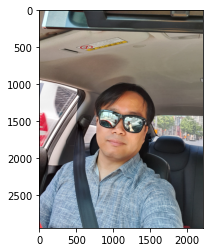

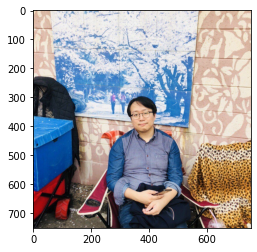

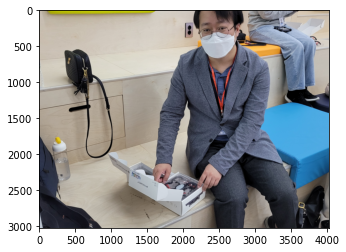

In [2]:
img6_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image6.png'
img7_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image7.png'
img8_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image8.png'

img6_orig = cv2.imread(img6_path)
img7_orig = cv2.imread(img7_path)
img8_orig = cv2.imread(img8_path)

print(img6_orig.shape)
print(img7_orig.shape)
print(img8_orig.shape)

plt.imshow(cv2.cvtColor(img6_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img7_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img8_orig, cv2.COLOR_BGR2RGB))
plt.show()

PixelLib에서 제공해 주는 모델을 다운로드 하기

In [3]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f9af23208e0>)

다운로드한 모델을 이용해 PixelLib로 우리가 사용할 세그멘테이션 모델을 생성하기

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

모델에 이미지를 입력하기

In [5]:
segvalues6, output6 = model.segmentAsPascalvoc(img6_path)
segvalues7, output7 = model.segmentAsPascalvoc(img7_path)
segvalues8, output8 = model.segmentAsPascalvoc(img8_path)

In [6]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

모델에서 나온 출력값 살펴보기

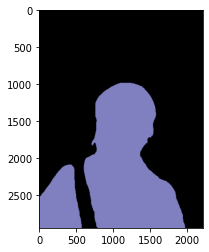

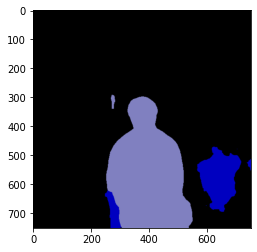

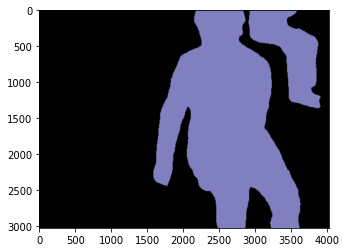

In [7]:
plt.imshow(output6)
plt.show()
plt.imshow(output7)
plt.show()
plt.imshow(output8)
plt.show()

In [13]:
segvalues6

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]])}

In [14]:
segvalues7

{'class_ids': array([ 0,  9, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [15]:
segvalues8

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [16]:
for class_id in segvalues6['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [17]:
for class_id in segvalues7['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
person


In [18]:
for class_id in segvalues8['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


segvalues에는 class_ids와 masks가 있고, class_ids를 통해 어떤 물체가 담겨 있는지 알 수 있다.  
물체마다 output에 어떤 색상으로 나타나 있는지 알아보기 

In [19]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [20]:
colormap[15]

array([192, 128, 128])

사람을 나타내는 15번째 색상 확인

사람 외에도 다른 물체를 찾아내고 싶다면 colormap[class_id]처럼 찾아낼 수 있다

output 이미지가 BGR 순서로 채널 배치,colormap은 RGB 순서  
우리가 추출해야 하는 색상 값은 순서를 아래처럼 바꿔 준다

In [21]:
seg_color = (128,128,192)

seg_color로만 이루어진 마스크를 만들어 보기

(2944, 2208)


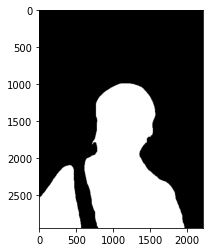

(750, 750)


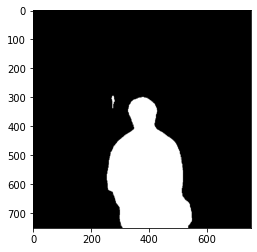

(3024, 4032)


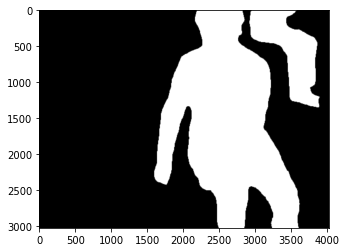

In [25]:
seg6_map = np.all(output6==seg_color, axis=-1)
print(seg6_map.shape)
plt.imshow(seg6_map, cmap='gray')
plt.show()

seg7_map = np.all(output7==seg_color, axis=-1)
print(seg7_map.shape)
plt.imshow(seg7_map, cmap='gray')
plt.show()

seg8_map = np.all(output8==seg_color, axis=-1)
print(seg8_map.shape)
plt.imshow(seg8_map, cmap='gray')
plt.show()

3채널 가졌던 원본과는 다르게 채널 정보가 사라짐  
물체가 있는 위치는 1(True), 그 외에는 0(False)인 배열이 됨

원본 이미지와 겹쳐서 세그멘테이션이 잘 되었는지 확인 하기

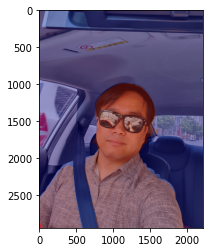

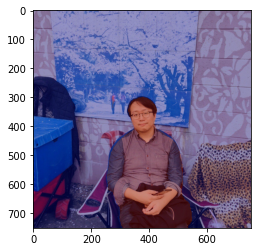

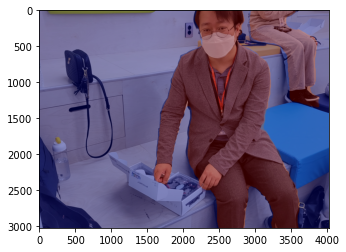

In [26]:
img6_show = img6_orig.copy()
img7_show = img7_orig.copy()
img8_show = img8_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img6_mask = seg6_map.astype(np.uint8) * 255
img7_mask = seg7_map.astype(np.uint8) * 255
img8_mask = seg8_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color6_mask = cv2.applyColorMap(img6_mask, cv2.COLORMAP_JET)
color7_mask = cv2.applyColorMap(img7_mask, cv2.COLORMAP_JET)
color8_mask = cv2.applyColorMap(img8_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img6_show = cv2.addWeighted(img6_show, 0.6, color6_mask, 0.4, 0.0)
img7_show = cv2.addWeighted(img7_show, 0.6, color7_mask, 0.4, 0.0)
img8_show = cv2.addWeighted(img8_show, 0.6, color8_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img6_show, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img7_show, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img8_show, cv2.COLOR_BGR2RGB))
plt.show()

배경을 흐리게 만들기 위해 blur() 함수를 이용  

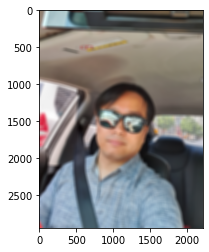

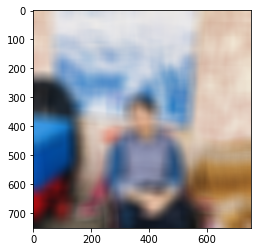

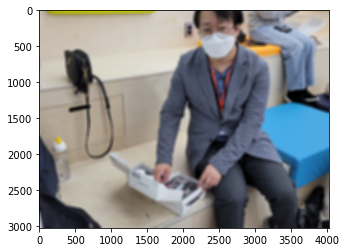

In [27]:
img6_orig_blur = cv2.blur(img6_orig, (50,50))  
plt.imshow(cv2.cvtColor(img6_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()
img7_orig_blur = cv2.blur(img7_orig, (50,50))  
plt.imshow(cv2.cvtColor(img7_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()
img8_orig_blur = cv2.blur(img8_orig, (50,50))  
plt.imshow(cv2.cvtColor(img8_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

흐려진 이미지에서 세그멘테이션 마스크를 이용해서 배경만 추출 하기

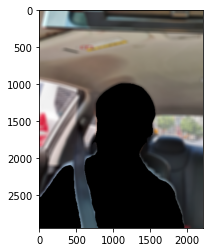

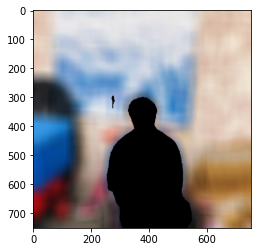

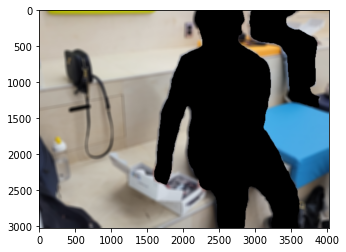

In [29]:
img6_mask_color = cv2.cvtColor(img6_mask, cv2.COLOR_GRAY2BGR)
img6_bg_mask = cv2.bitwise_not(img6_mask_color)
img6_bg_blur = cv2.bitwise_and(img6_orig_blur, img6_bg_mask)
plt.imshow(cv2.cvtColor(img6_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

img7_mask_color = cv2.cvtColor(img7_mask, cv2.COLOR_GRAY2BGR)
img7_bg_mask = cv2.bitwise_not(img7_mask_color)
img7_bg_blur = cv2.bitwise_and(img7_orig_blur, img7_bg_mask)
plt.imshow(cv2.cvtColor(img7_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

img8_mask_color = cv2.cvtColor(img8_mask, cv2.COLOR_GRAY2BGR)
img8_bg_mask = cv2.bitwise_not(img8_mask_color)
img8_bg_blur = cv2.bitwise_and(img8_orig_blur, img8_bg_mask)
plt.imshow(cv2.cvtColor(img8_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

bitwise_not 함수를 이용하여 이미지를 반전  
(원래 마스크에서는 배경이 0, 사람이 255,  bitwise_not 연산을 하고 나면 배경은 255, 사람은 0)  
반전된 세그멘테이션 결과를 이용해서 이미지와 bitwise_and 연산을 수행하면 배경만 있는 영상을 얻을 수 있다.  
(0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0. 결국 사람이 사라지게 된다.)

배경 영상과 사람 영상을 합치기

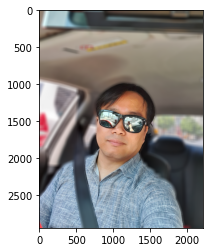

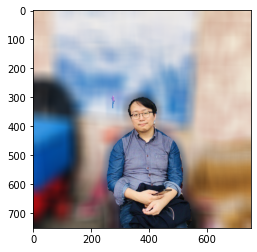

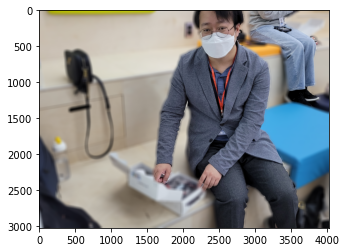

In [30]:
img6_concat = np.where(img6_mask_color==255, img6_orig, img6_bg_blur)
plt.imshow(cv2.cvtColor(img6_concat, cv2.COLOR_BGR2RGB))
plt.show()

img7_concat = np.where(img7_mask_color==255, img7_orig, img7_bg_blur)
plt.imshow(cv2.cvtColor(img7_concat, cv2.COLOR_BGR2RGB))
plt.show()

img8_concat = np.where(img8_mask_color==255, img8_orig, img8_bg_blur)
plt.imshow(cv2.cvtColor(img8_concat, cv2.COLOR_BGR2RGB))
plt.show()

# step1-2 강아지 사진 해보기

(1440, 1080, 3)
(1440, 1080, 3)
(1008, 756, 3)


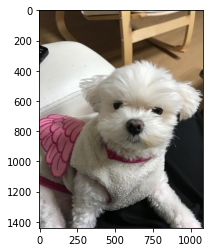

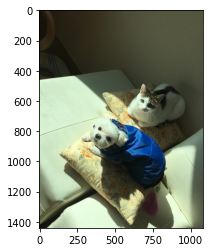

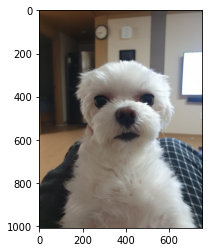

In [31]:
img9_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image9.png'
img10_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image10.png'
img11_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/image11.png'

img9_orig = cv2.imread(img9_path)
img10_orig = cv2.imread(img10_path)
img11_orig = cv2.imread(img11_path)

print(img9_orig.shape)
print(img10_orig.shape)
print(img11_orig.shape)

plt.imshow(cv2.cvtColor(img9_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img10_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img11_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [32]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f9a088e2460>)

In [33]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [34]:
segvalues9, output9 = model.segmentAsPascalvoc(img9_path)
segvalues10, output10 = model.segmentAsPascalvoc(img10_path)
segvalues11, output11 = model.segmentAsPascalvoc(img11_path)

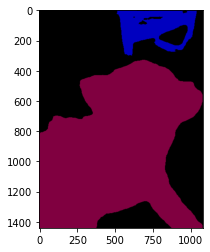

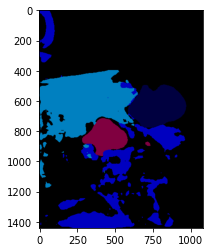

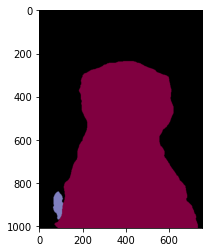

In [36]:
plt.imshow(output9)
plt.show()
plt.imshow(output10)
plt.show()
plt.imshow(output11)
plt.show()

In [37]:
segvalues9

{'class_ids': array([ 0,  9, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ...,  True, False, False],
        [False, False,  True, ...,  True, False, False],
        [False, False,  True, ...,  True, False, False]])}

In [38]:
segvalues10

{'class_ids': array([ 0,  8,  9, 11, 12]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False,  True, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [39]:
segvalues11

{'class_ids': array([ 0, 12, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [40]:
for class_id in segvalues9['class_ids']:
    print(LABEL_NAMES[class_id])

background
chair
dog


In [41]:
for class_id in segvalues10['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
chair
diningtable
dog


In [42]:
for class_id in segvalues11['class_ids']:
    print(LABEL_NAMES[class_id])

background
dog
person


In [47]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

In [51]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [52]:
colormap[12]

array([ 64,   0, 128])

In [54]:
seg_color = (128,0,64)

(1440, 1080)


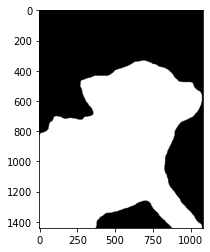

(1440, 1080)


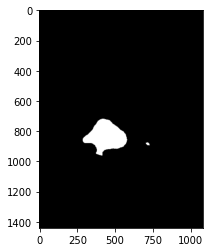

(1008, 756)


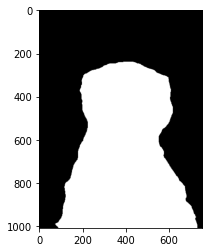

In [55]:
seg9_map = np.all(output9==seg_color, axis=-1)
print(seg9_map.shape)
plt.imshow(seg9_map, cmap='gray')
plt.show()

seg10_map = np.all(output10==seg_color, axis=-1)
print(seg10_map.shape)
plt.imshow(seg10_map, cmap='gray')
plt.show()

seg11_map = np.all(output11==seg_color, axis=-1)
print(seg11_map.shape)
plt.imshow(seg11_map, cmap='gray')
plt.show()

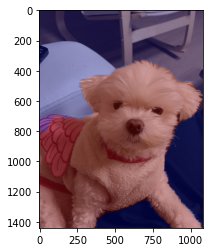

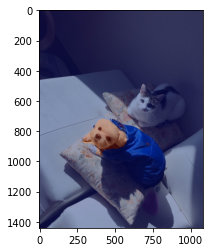

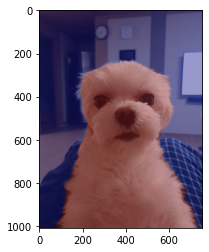

In [56]:
img9_show = img9_orig.copy()
img10_show = img10_orig.copy()
img11_show = img11_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img9_mask = seg9_map.astype(np.uint8) * 255
img10_mask = seg10_map.astype(np.uint8) * 255
img11_mask = seg11_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color9_mask = cv2.applyColorMap(img9_mask, cv2.COLORMAP_JET)
color10_mask = cv2.applyColorMap(img10_mask, cv2.COLORMAP_JET)
color11_mask = cv2.applyColorMap(img11_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img9_show = cv2.addWeighted(img9_show, 0.6, color9_mask, 0.4, 0.0)
img10_show = cv2.addWeighted(img10_show, 0.6, color10_mask, 0.4, 0.0)
img11_show = cv2.addWeighted(img11_show, 0.6, color11_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img9_show, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img10_show, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img11_show, cv2.COLOR_BGR2RGB))
plt.show()

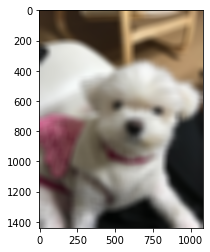

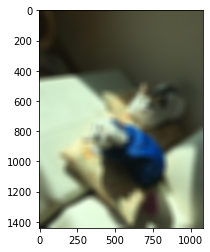

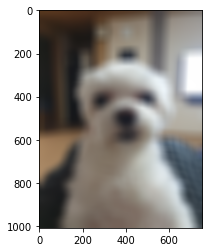

In [57]:
img9_orig_blur = cv2.blur(img9_orig, (50,50))  
plt.imshow(cv2.cvtColor(img9_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()
img10_orig_blur = cv2.blur(img10_orig, (50,50))  
plt.imshow(cv2.cvtColor(img10_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()
img11_orig_blur = cv2.blur(img11_orig, (50,50))  
plt.imshow(cv2.cvtColor(img11_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

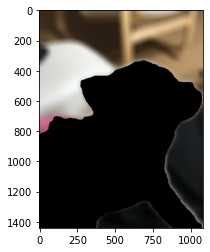

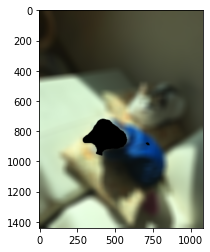

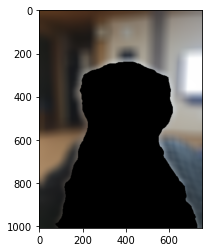

In [58]:
img9_mask_color = cv2.cvtColor(img9_mask, cv2.COLOR_GRAY2BGR)
img9_bg_mask = cv2.bitwise_not(img9_mask_color)
img9_bg_blur = cv2.bitwise_and(img9_orig_blur, img9_bg_mask)
plt.imshow(cv2.cvtColor(img9_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

img10_mask_color = cv2.cvtColor(img10_mask, cv2.COLOR_GRAY2BGR)
img10_bg_mask = cv2.bitwise_not(img10_mask_color)
img10_bg_blur = cv2.bitwise_and(img10_orig_blur, img10_bg_mask)
plt.imshow(cv2.cvtColor(img10_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

img11_mask_color = cv2.cvtColor(img11_mask, cv2.COLOR_GRAY2BGR)
img11_bg_mask = cv2.bitwise_not(img11_mask_color)
img11_bg_blur = cv2.bitwise_and(img11_orig_blur, img11_bg_mask)
plt.imshow(cv2.cvtColor(img11_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

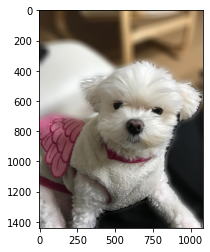

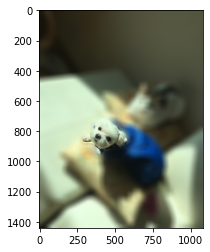

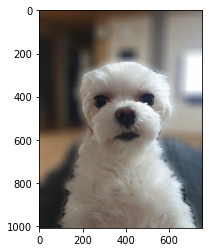

In [59]:
img9_concat = np.where(img9_mask_color==255, img9_orig, img9_bg_blur)
plt.imshow(cv2.cvtColor(img9_concat, cv2.COLOR_BGR2RGB))
plt.show()

img10_concat = np.where(img10_mask_color==255, img10_orig, img10_bg_blur)
plt.imshow(cv2.cvtColor(img10_concat, cv2.COLOR_BGR2RGB))
plt.show()

img11_concat = np.where(img11_mask_color==255, img11_orig, img11_bg_blur)
plt.imshow(cv2.cvtColor(img11_concat, cv2.COLOR_BGR2RGB))
plt.show()

# step1-3 크로마키 배경 합성 해보기

(2944, 2208, 3)
(750, 750, 3)
(3024, 4032, 3)
(1440, 1080, 3)
(1440, 1080, 3)
(1008, 756, 3)


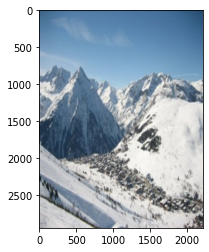

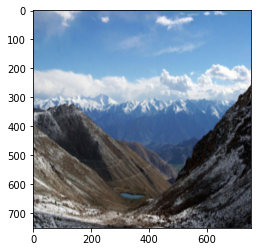

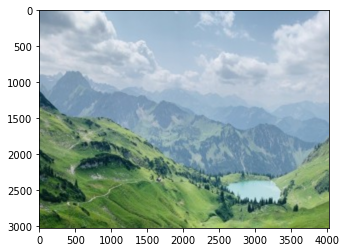

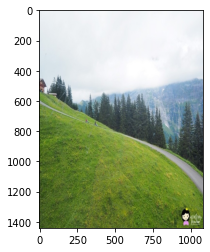

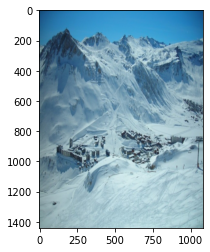

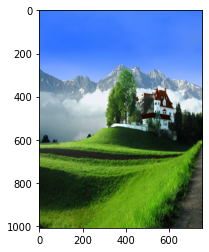

In [64]:
img12_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/images6.png'
img13_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/images7.png'
img14_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/images8.png'
img15_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/images9.png'
img16_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/images10.png'
img17_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/images11.png'

img12_orig = cv2.imread(img12_path)
img13_orig = cv2.imread(img13_path)
img14_orig = cv2.imread(img14_path)
img15_orig = cv2.imread(img15_path)
img16_orig = cv2.imread(img16_path)
img17_orig = cv2.imread(img17_path)

print(img12_orig.shape)
print(img13_orig.shape)
print(img14_orig.shape)
print(img15_orig.shape)
print(img16_orig.shape)
print(img17_orig.shape)

plt.imshow(cv2.cvtColor(img12_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img13_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img14_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img15_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img16_orig, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img17_orig, cv2.COLOR_BGR2RGB))
plt.show()

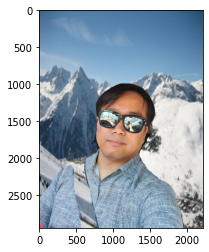

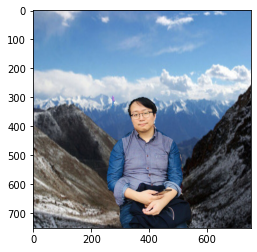

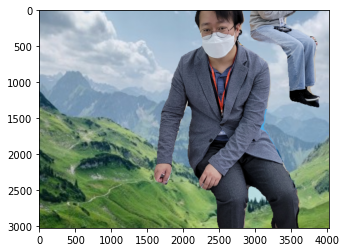

In [73]:
img12_concat = np.where(img6_mask_color==255, img6_orig, img12_orig)
plt.imshow(cv2.cvtColor(img12_concat, cv2.COLOR_BGR2RGB))
plt.show()

img13_concat = np.where(img7_mask_color==255, img7_orig, img13_orig)
plt.imshow(cv2.cvtColor(img13_concat, cv2.COLOR_BGR2RGB))
plt.show()

img14_concat = np.where(img8_mask_color==255, img8_orig, img14_orig)
plt.imshow(cv2.cvtColor(img14_concat, cv2.COLOR_BGR2RGB))
plt.show()

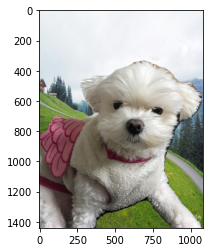

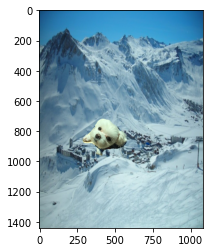

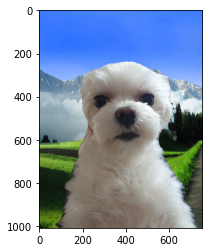

In [74]:
img15_concat = np.where(img9_mask_color==255, img9_orig, img15_orig)
plt.imshow(cv2.cvtColor(img15_concat, cv2.COLOR_BGR2RGB))
plt.show()

img16_concat = np.where(img10_mask_color==255, img10_orig, img16_orig)
plt.imshow(cv2.cvtColor(img16_concat, cv2.COLOR_BGR2RGB))
plt.show()

img17_concat = np.where(img11_mask_color==255, img11_orig, img17_orig)
plt.imshow(cv2.cvtColor(img17_concat, cv2.COLOR_BGR2RGB))
plt.show()

# step2 사진에서 문제점 찾기

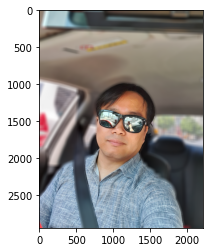
<center>안전벨트 부분까지 흐리게 처리됨</center>

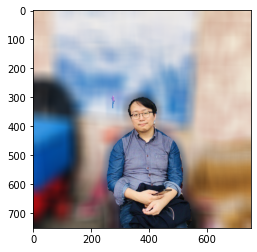
<center>뒷배경의 사람 그림도 같이 사람으로 인식됨</center>

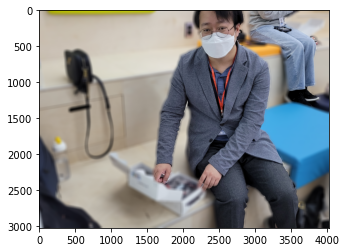
<center>뒤에 사람도 같이 인식되어 흐리게 처리 안됨</center>

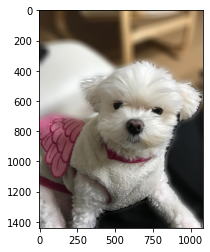
<center>경계선이 매끄럽지 않고 너무 뚜렸하게 나옴</center>

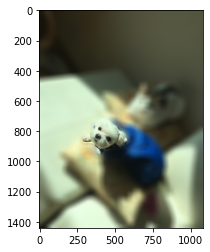
<center>옷을 배경으로 인식하여 흐리게 처리됨</center>

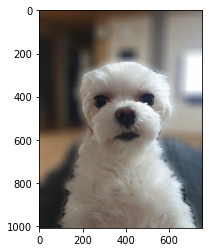
<center>경계선이 매끄럽지 않고 거친 여러개의 직선으로 처리됨</center>

# step3 해결 방법 제안해보기

### 해결방안//

1. 배경임에도 블러 처리가 되지 않는 경우

ToF (Time Of Flight) 방식 사용

ToF 는 Time Of flight 로 비행시간, 즉 빛을 쏘아서 반사되어 오는 시간을 측정하여 거리를 계산하는 방식이다. 
ToF 방식을 사용하여 각 픽셀이 피사체까지의 거리를 결정할 수 있는 픽셀 배열로 구성하여 거리(depth) 이미지를 얻을 수 있다.
이를 바탕으로 정확한 Image Segmentation 이 가능 할 것이다,

2. 경계선이 뚜렸하여 부자연스러운 부분

피사체 이미지의 가장자리 부분을 Gaussian Blur 처리 Segmentation 로 검출된 피사체 이미지의 가장자리에 가우시안 분포를 갖는 커널로
블러링 하는 가우시안 블러링(Gaussian Blur) 처리를 해주어 경계선을 자연스럽게 할 수 있다.

# 회고

핸드폰 사진촬영에서 보던 포커스 기능을 내가 직접 코딩으로 비슷하게 구현해 보게 되는 재미있는 과제였다.  
그리고 인터넷에 포토삽 같은 프로그램을 통해 합성을 하던 방법을 코딩을 통해서도 할 수 있다는 것을 알게 되었다.  
하지만 막상 시중에 보는 어플과 같은 매끄럽고 자연스러운 기능까지는 완벽히 구현이 되지 않아 아쉬웠다.  
다음번엔 구글 pixel4를 이용하여 포커스 기능을 활용하는 방법을 해 보고 싶다.

 * 참고: 이재준 퍼실님 깃허브 참고.